# Welcome to the Perfect Vacation project analysis

### By Israel Sinke and Lior Lakay - Holon Institute of Technology

<img src="https://www.libertytravel.com/sites/default/files/styles/full_size/public/all%20inclusive-hero%20%281%29.jpg?itok=JjwsPBPZ" width="800" height="400"/>

# Backround
### As we both people who love to travel, we encounter the ultimate question in each of our trips - **where is the best place to stay in during our trip?**

### In this project we will try to answer this question 

## Our machine learning question will be:
#### **Can we predicting the rate of rental apartment depends on specific apartment's attributes**

### Let's start checking it...

In [323]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

First, we will load our dataset that we have acquired using our crawler into pandas dataframe:

In [324]:
apartments_data = pd.read_csv('data_output.csv')

This is how it looks like before we start working on it:

In [325]:
apartments_data

,Unnamed: 0,Location,Name,Rooms,Guests,Pets,Wifi,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate
0,0,Glendale,Room in Glendale,1,2,False,True,True,True,True,True,True,True,True,True,True,False,322,5,5.00
1,1,Redondo Beach,Home in Redondo Beach,1,2,True,True,True,True,True,NaN,NaN,True,True,True,True,False,610,3,4.67
2,2,Los Angeles,Guesthouse in Los Angeles,1,2,False,True,True,True,True,NaN,True,True,True,True,NaN,True,912,249,4.97
3,3,Inglewood,Boutique hotel in Inglewood,1,2,False,True,True,NaN,NaN,NaN,True,True,True,True,NaN,False,453,1132,4.28
4,4,Los Angeles,Room in Los Angeles,1,1,False,True,NaN,True,True,NaN,True,True,NaN,NaN,NaN,False,310,4,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2965,San Antonio,Apartment in San Antonio,1,3,False,True,True,True,True,NaN,True,True,True,True,True,True,319,334,4.85
2966,2966,San Antonio,Tiny home in San Antonio,1,2,True,True,True,True,True,NaN,True,True,True,True,NaN,False,196,5,4.60
2967,2967,San Antonio,Apartment in San Antonio,1,4,False,True,True,True,True,NaN,True,True,True,True,True,False,372,1,5.00
2968,2968,San Antonio,Apartment in San Antonio,1,2,False,True,True,True,True,NaN,True,True,True,True,True,True,319,74,4.81


## New features creation 

1. We will create new categorized feature, named 'house_type', according to the type of asset in order to use it later 

In [326]:
apartments_data.loc[apartments_data.Name.str.contains('villa', case=False, na=False),'house_type'] = 'Villas'
apartments_data.loc[apartments_data.Name.str.contains('guest|suite', case=False, na=False),'house_type'] = 'Guesthouse'
apartments_data.loc[apartments_data.Name.str.contains('apartment|home', case=False, na=False),'house_type'] = 'Apartment'
apartments_data.loc[apartments_data.Name.str.contains('room', case=False, na=False),'house_type'] = 'Single Room'
apartments_data.loc[apartments_data.Name.str.contains('hotel|resort', case=False, na=False),'house_type'] = 'Hotels and Resorts'
apartments_data.loc[apartments_data.Name.str.contains('condo', case=False, na=False),'house_type'] = 'Condo'
apartments_data.loc[apartments_data.Name.str.contains('hostel', case=False, na=False),'house_type'] = 'Hostel'
apartments_data.loc[apartments_data.Name.str.contains('loft', case=False, na=False),'house_type'] = 'Loft'
apartments_data.loc[apartments_data.Name.str.contains('townhouse', case=False, na=False),'house_type'] = 'Townhouse'
apartments_data.loc[apartments_data.Name.str.contains('place to stay', case=False, na=False),'house_type'] = 'Unspecified type of place'

2. We will seperate 'total_rate' score into 6 score categories  

In [327]:
apartments_data.loc[(apartments_data['Total_rate'] < 4) & (apartments_data['Total_rate'] != 0), 'rate_category'] = 'Below 4'
apartments_data.loc[(apartments_data.Total_rate >= 4) & (apartments_data.Total_rate < 4.2) , 'rate_category'] = '4-4.2'
apartments_data.loc[(apartments_data.Total_rate >= 4.2) & (apartments_data.Total_rate < 4.4) , 'rate_category'] = '4.2-4.4'
apartments_data.loc[(apartments_data.Total_rate >= 4.4) & (apartments_data.Total_rate < 4.6) , 'rate_category'] = '4.4-4.6'
apartments_data.loc[(apartments_data.Total_rate >= 4.6) & (apartments_data.Total_rate < 4.8) , 'rate_category'] = '4.6-4.8'
apartments_data.loc[apartments_data.Total_rate >= 4.8, 'rate_category'] = '4.8-5'

We decide to do that because it can improve our prediction by trying predicting categorial feature instead of continious feature 

# Data Cleanup

We've started with data frame with the shape mention below

In [328]:
apartments_data.shape

(2970, 22)

Which look like this:

In [329]:
apartments_data

,Unnamed: 0,Location,Name,Rooms,Guests,Pets,Wifi,Free_parking,Refrigerator,Kitchen,...,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate,house_type,rate_category
0,0,Glendale,Room in Glendale,1,2,False,True,True,True,True,...,True,True,True,True,False,322,5,5.00,Single Room,4.8-5
1,1,Redondo Beach,Home in Redondo Beach,1,2,True,True,True,True,True,...,True,True,True,True,False,610,3,4.67,Apartment,4.6-4.8
2,2,Los Angeles,Guesthouse in Los Angeles,1,2,False,True,True,True,True,...,True,True,True,NaN,True,912,249,4.97,Guesthouse,4.8-5
3,3,Inglewood,Boutique hotel in Inglewood,1,2,False,True,True,NaN,NaN,...,True,True,True,NaN,False,453,1132,4.28,Hotels and Resorts,4.2-4.4
4,4,Los Angeles,Room in Los Angeles,1,1,False,True,NaN,True,True,...,True,NaN,NaN,NaN,False,310,4,5.00,Single Room,4.8-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2965,San Antonio,Apartment in San Antonio,1,3,False,True,True,True,True,...,True,True,True,True,True,319,334,4.85,Apartment,4.8-5
2966,2966,San Antonio,Tiny home in San Antonio,1,2,True,True,True,True,True,...,True,True,True,NaN,False,196,5,4.60,Apartment,4.6-4.8
2967,2967,San Antonio,Apartment in San Antonio,1,4,False,True,True,True,True,...,True,True,True,True,False,372,1,5.00,Apartment,4.8-5
2968,2968,San Antonio,Apartment in San Antonio,1,2,False,True,True,True,True,...,True,True,True,True,True,319,74,4.81,Apartment,4.8-5


### 1. *Remove duplicates*

As each of the records in our dataset representing an unique apartment, there is no duplications in our data:

In [330]:
apartments_data.duplicated().sum()

0

### 2. *Categorial/Numeric representation*

We will map each location to relevant city 

In [331]:
for index, i in enumerate(range(1,12)):
    if index == 0:
        apartments_data.loc[:269, 'Location'] = i
        continue
    
    start = (i - 1) * 270  
    end = i * 269 + (i - 1)
    apartments_data.loc[start :end, 'Location'] = i

locations_dict = {
    1: 'Los Angles',
    2: 'New York City',
    3: 'Miami',
    4: 'Chicago',
    5: 'Washington DC',
    6: 'Boston',
    7: 'Baltimore',
    8: 'San Francisco',
    9: 'Seattle',
    10: 'Phonex',
    11: 'San Antonio'
}

apartments_data.Location = apartments_data.Location.map(locations_dict)

And every binary feature to numeric representation 

In [332]:
binary_values = {True: 1, False: 0}
apartments_data.replace(binary_values, inplace=True)

### 3. *Missing values*

Checking how much missing values we have

In [333]:
apartments_data.isnull().sum()

Unnamed: 0          0
Location            0
Name                0
Rooms               0
Guests              0
Pets              106
Wifi               46
Free_parking      590
Refrigerator      455
Kitchen           461
Smoke_alarm      2280
Cooling           410
Heating           307
TV                498
Bed_lines         777
Washer           1000
Super_host          0
Price               0
Review_count        0
Total_rate          0
house_type          0
rate_category     232
dtype: int64

First, we will fill the missing values.
We know that missing values indicates that those features is not include in the apartment, i.e. its False

In [334]:
apartments_data[
    [
        'Wifi',
        'Free_parking',
        'Refrigerator',
        'Kitchen',
        'Smoke_alarm',
        'Cooling',
        'Heating',
        'TV',
        'Bed_lines',
        'Washer',
        'Pets'
    ]
] = apartments_data[
    [
        'Wifi',
        'Free_parking',
        'Refrigerator',
        'Kitchen',
        'Smoke_alarm',
        'Cooling',
        'Heating',
        'TV',
        'Bed_lines',
        'Washer',
        'Pets'
    ]
].fillna(False)

And we will get rid of records with NaN values in 'rate_category', which existing because they dont have any reviewers:

In [335]:
apartments_data[apartments_data['rate_category'].isna()][['Name', 'Review_count', 'Total_rate', 'rate_category']]

,Name,Review_count,Total_rate,rate_category
7,Apartment in Los Angeles,0,0.0,NaN
15,Room in Lawndale,0,0.0,NaN
34,Apartment in West Hollywood,0,0.0,NaN
35,Room in Lawndale,0,0.0,NaN
46,Apartment in Los Angeles,0,0.0,NaN
...,...,...,...,...
2856,Room in San Antonio,0,0.0,NaN
2867,Room in San Antonio,0,0.0,NaN
2872,Apartment in San Antonio,0,0.0,NaN
2924,Room in San Antonio,0,0.0,NaN


In [336]:
apartments_data = apartments_data[~apartments_data['rate_category'].isna()] 

In [337]:
apartments_data = apartments_data.replace(binary_values)
apartments_data.isnull().sum()

Unnamed: 0       0
Location         0
Name             0
Rooms            0
Guests           0
Pets             0
Wifi             0
Free_parking     0
Refrigerator     0
Kitchen          0
Smoke_alarm      0
Cooling          0
Heating          0
TV               0
Bed_lines        0
Washer           0
Super_host       0
Price            0
Review_count     0
Total_rate       0
house_type       0
rate_category    0
dtype: int64

### 4. *Filtering*

According to statistical methods, we will use only Airbnb's records with more than 20 people reviews for more precise conclusions

In [338]:
apartments_data = apartments_data[apartments_data['Review_count'] > 20]

And we will drop the unrelevant columns

In [339]:
apartments_data = apartments_data.iloc[:, 1:]
apartments_data = apartments_data.drop('Name', axis=1)

We will get rid of the 'wifi' feature because of 98% of the assets including it, i.e. the feature does not give us any meaningful knowledge 

In [340]:
apartments_data.Wifi.value_counts(normalize=True)

1    0.980695
0    0.019305
Name: Wifi, dtype: float64

In [341]:
apartments_data.drop('Wifi', axis=1, inplace=True)

We will check the correlation between the remaining features in order to see if there's more features we can get rid of:

<AxesSubplot:>

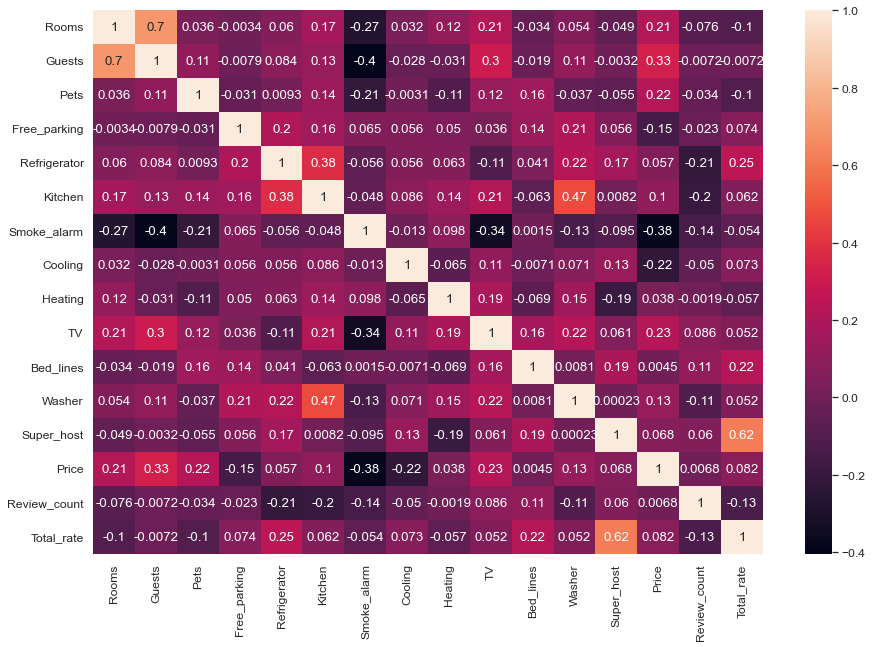

In [342]:
plt.figure(figsize=(15,10))
sns.heatmap(apartments_data.corr(),annot=True)

As we can see, the highest correlation is between number of guests and the number of rooms which make sense.
Besides that, we can assume that the rest of the features are relevant according to low correlations.

After the data cleanup part the dataframe looks like this:

In [343]:
apartments_data

,Location,Rooms,Guests,Pets,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate,house_type,rate_category
2,Los Angles,1,2,0,1,1,1,0,1,1,1,1,0,1,912,249,4.97,Guesthouse,4.8-5
3,Los Angles,1,2,0,1,0,0,0,1,1,1,1,0,0,453,1132,4.28,Hotels and Resorts,4.2-4.4
5,Los Angles,1,2,0,0,1,1,0,1,1,1,1,1,1,825,135,4.95,Apartment,4.8-5
6,Los Angles,1,1,0,1,1,1,0,1,1,1,0,0,1,503,100,4.98,Guesthouse,4.8-5
8,Los Angles,1,1,0,1,1,1,0,1,1,0,0,1,0,198,117,4.70,Unspecified type of place,4.6-4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,San Antonio,2,4,0,1,1,1,0,1,1,1,1,1,1,730,68,4.97,Apartment,4.8-5
2963,San Antonio,1,2,0,1,1,1,0,1,1,1,1,1,1,123,38,5.00,Unspecified type of place,4.8-5
2965,San Antonio,1,3,0,1,1,1,0,1,1,1,1,1,1,319,334,4.85,Apartment,4.8-5
2968,San Antonio,1,2,0,1,1,1,0,1,1,1,1,1,1,319,74,4.81,Apartment,4.8-5


In [344]:
apartments_data.shape

(1813, 19)

# EDA

As we can see below, most of the rental assets is the kind of `Apartment` or `Single room`  

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

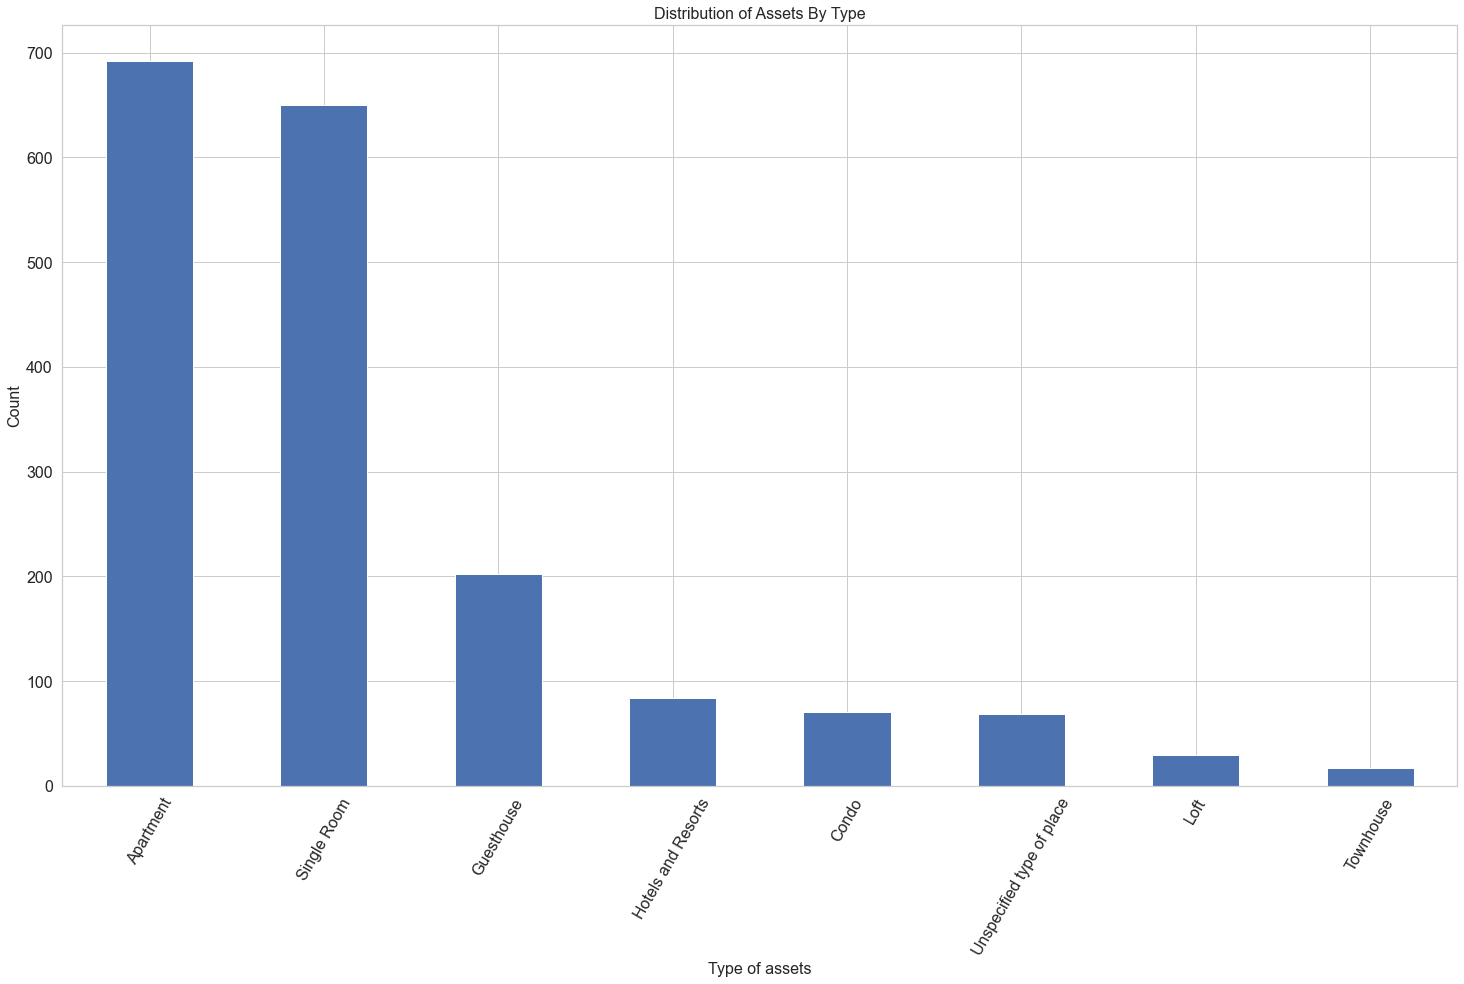

In [345]:
apartments_data['house_type'].value_counts().plot(kind='bar', rot=60)
plt.title('Distribution of Assets By Type', fontsize=16)
plt.xlabel('Type of assets', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Let's check the prices distribution by the asset's type 

c:\Users\liorl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of prices by house types'}, xlabel='house_type', ylabel='Price'>

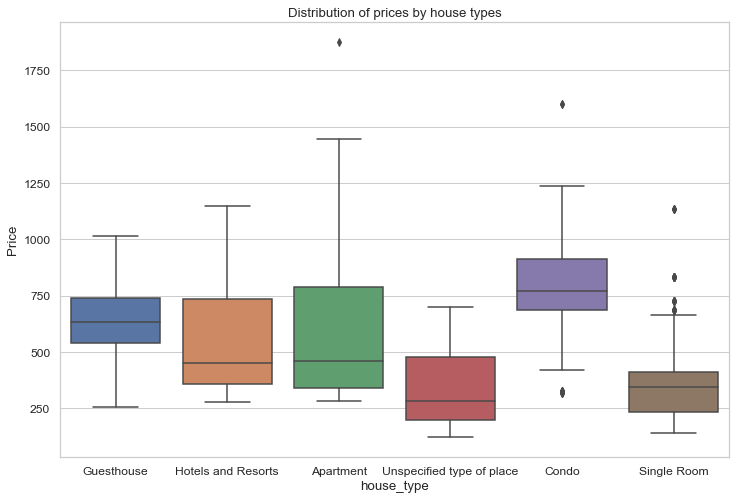

In [346]:
plt.figure(figsize=(12,8))
plt.title('Distribution of prices by house types')
sns.boxplot(apartments_data.house_type[~apartments_data.house_type.isin(['Loft','Townhouse'])], y=apartments_data.Price) # we can illustrate the outliers of specific column

As we can see in the box plot above, this is the distribution of the prices with different house types.
We decided to exclude the "Loft" and "Townhouse" house types because of non knowledgeful distribution that occurs because of lake of data for this kind of house types.

And we will check the score distribution of assets by their type:

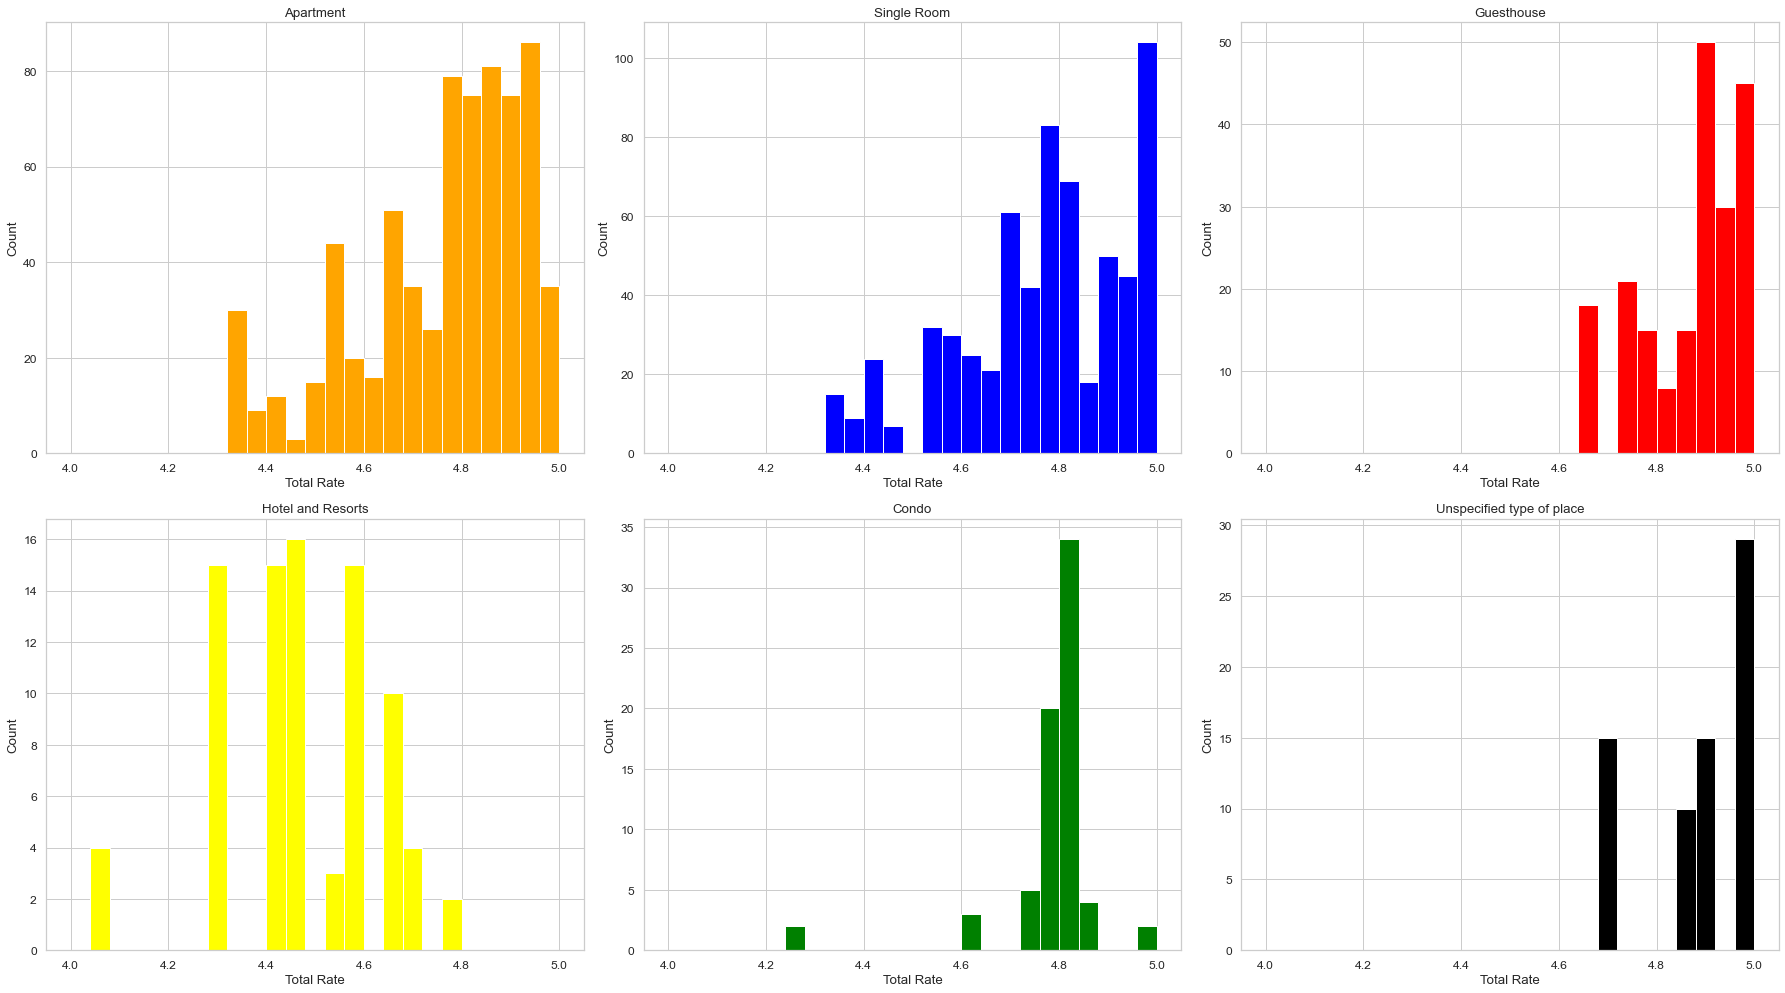

In [347]:
rates_by_house_type = apartments_data[['Total_rate','house_type']].groupby('house_type').value_counts().reset_index(name='count')

plt.subplot(2, 3, 1)
plt.hist(rates_by_house_type[rates_by_house_type.house_type == 'Apartment']['Total_rate'], 
         weights=rates_by_house_type[rates_by_house_type.house_type == 'Apartment']['count'],
         range=(4, 5),
         bins=25,
         color='orange')
plt.xlabel('Total Rate')
plt.ylabel('Count')
plt.title('Apartment')

plt.subplot(2, 3, 2)
plt.hist(rates_by_house_type[rates_by_house_type.house_type == 'Single Room']['Total_rate'], 
         weights=rates_by_house_type[rates_by_house_type.house_type == 'Single Room']['count'],
         range=(4, 5),
         bins=25,
         color='blue')
plt.xlabel('Total Rate')
plt.ylabel('Count')
plt.title('Single Room')

plt.subplot(2, 3, 3)
plt.hist(rates_by_house_type[rates_by_house_type.house_type == 'Guesthouse']['Total_rate'], 
         weights=rates_by_house_type[rates_by_house_type.house_type == 'Guesthouse']['count'],
         range=(4, 5),
         bins=25,
         color='red')
plt.xlabel('Total Rate')
plt.ylabel('Count')
plt.title('Guesthouse')

plt.subplot(2, 3, 4)
plt.hist(rates_by_house_type[rates_by_house_type.house_type == 'Hotels and Resorts']['Total_rate'], 
         weights=rates_by_house_type[rates_by_house_type.house_type == 'Hotels and Resorts']['count'],
         range=(4, 5),
         bins=25,
         color='yellow')
plt.xlabel('Total Rate')
plt.ylabel('Count')
plt.title('Hotel and Resorts')

plt.subplot(2, 3, 5)
plt.hist(rates_by_house_type[rates_by_house_type.house_type == 'Condo']['Total_rate'], 
         weights=rates_by_house_type[rates_by_house_type.house_type == 'Condo']['count'],
         range=(4, 5),
         bins=25,
         color='green')
plt.xlabel('Total Rate')
plt.ylabel('Count')
plt.title('Condo')

plt.subplot(2, 3, 6)
plt.hist(rates_by_house_type[rates_by_house_type.house_type == 'Unspecified type of place']['Total_rate'], 
         weights=rates_by_house_type[rates_by_house_type.house_type == 'Unspecified type of place']['count'],
         range=(4, 5),
         bins=25,
         color='black')
plt.xlabel('Total Rate')
plt.ylabel('Count')
plt.title('Unspecified type of place')

plt.tight_layout()
plt.show()


We can see different rates distribution for each asset type. We've decided not to include here `Loft` and `Townhouse` house types because of bad distribution due to lack of data for these house types.

In the table below we can see the results of average asset's rate by location:     

In [348]:
apartments_data[['Total_rate', 'Location']].groupby('Location').mean().sort_values('Total_rate', ascending=False)

,Total_rate
Location,
San Antonio,4.869592
Phonex,4.818867
Los Angles,4.798963
Seattle,4.797486
New York City,4.765368
San Francisco,4.756883
Washington DC,4.731988
Chicago,4.721277
Baltimore,4.718912


Let's try to oberve the difference of features values between highest and lowest ranked cities:

In [349]:
apartments_data[apartments_data.Location == 'San Antonio'].describe() 

,Rooms,Guests,Pets,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate
count,196.000000,196.000000,196.000000,196.0,196.000000,196.0,196.000000,196.0,196.0,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.250000,2.581633,0.168367,1.0,0.969388,1.0,0.183673,1.0,1.0,0.877551,0.928571,0.760204,0.719388,295.857143,129.290816,4.869592
std,0.434122,1.149568,0.375150,0.0,0.172706,0.0,0.388209,0.0,0.0,0.328643,0.258199,0.428052,0.450449,146.341154,95.231066,0.092597
min,1.000000,1.000000,0.000000,1.0,0.000000,1.0,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,123.000000,28.000000,4.620000
25%,1.000000,2.000000,0.000000,1.0,1.000000,1.0,0.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000,157.750000,56.000000,4.840000
50%,1.000000,2.000000,0.000000,1.0,1.000000,1.0,0.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,299.000000,91.000000,4.880000
75%,1.250000,4.000000,0.000000,1.0,1.000000,1.0,0.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,339.000000,197.000000,4.930000
max,2.000000,5.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,730.000000,385.000000,5.000000


In [350]:
apartments_data[apartments_data.Location == 'Boston'].describe() 

,Rooms,Guests,Pets,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,Total_rate
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.0,181.0,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,1.165746,2.265193,0.022099,0.917127,0.917127,0.917127,0.546961,1.0,1.0,0.668508,0.569061,0.767956,0.237569,548.165746,46.861878,4.639171
std,0.372884,0.910649,0.147415,0.276455,0.276455,0.276455,0.499171,0.0,0.0,0.472055,0.496581,0.423308,0.426774,233.859015,20.889863,0.288232
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,340.000000,31.000000,3.810000
25%,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,0.000000,0.000000,1.000000,0.000000,369.000000,37.000000,4.660000
50%,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000,413.000000,38.000000,4.760000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000,799.000000,49.000000,4.790000
max,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1059.000000,126.000000,4.940000


As we can easily see, most of the features of the highest ranked city (i.e. San Antonio) are "better" than Boston's:  

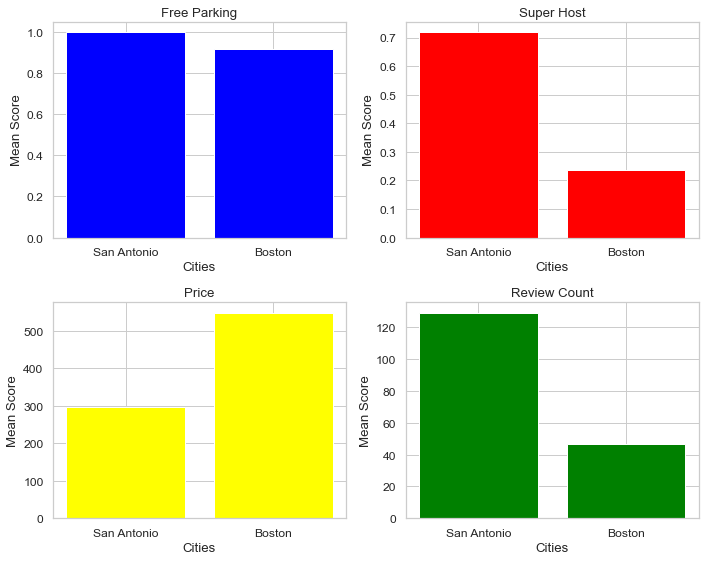

In [351]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
san_antonio_parking = apartments_data[apartments_data.Location == 'San Antonio']['Free_parking'].mean()
boston_parking = apartments_data[apartments_data.Location == 'Boston']['Free_parking'].mean()
data = np.array([san_antonio_parking, boston_parking])
indices = np.arange(len(data))
plt.bar(indices, data, color='blue')
plt.xlabel('Cities')
plt.ylabel('Mean Score')
plt.title('Free Parking')
plt.xticks(indices, ['San Antonio', 'Boston'])
plt.grid(True)

plt.subplot(2, 2, 2)
san_antonio_super_host = apartments_data[apartments_data.Location == 'San Antonio']['Super_host'].mean()
boston_super_host = apartments_data[apartments_data.Location == 'Boston']['Super_host'].mean()
data = np.array([san_antonio_super_host, boston_super_host])
indices = np.arange(len(data))
plt.bar(indices, data, color='red')
plt.xlabel('Cities')
plt.ylabel('Mean Score')
plt.title('Super Host')
plt.xticks(indices, ['San Antonio', 'Boston'])
plt.grid(True)

plt.subplot(2, 2, 3)
san_antonio_price = apartments_data[apartments_data.Location == 'San Antonio']['Price'].mean()
boston_price = apartments_data[apartments_data.Location == 'Boston']['Price'].mean()
data = np.array([san_antonio_price, boston_price])
indices = np.arange(len(data))
plt.bar(indices, data, color='yellow')
plt.xlabel('Cities')
plt.ylabel('Mean Score')
plt.title('Price')
plt.xticks(indices, ['San Antonio', 'Boston'])
plt.grid(True)


plt.subplot(2, 2, 4)
san_antonio_review_count = apartments_data[apartments_data.Location == 'San Antonio']['Review_count'].mean()
boston_review_count = apartments_data[apartments_data.Location == 'Boston']['Review_count'].mean()
data = np.array([san_antonio_review_count, boston_review_count])
indices = np.arange(len(data))
plt.bar(indices, data, color='green')
plt.xlabel('Cities')
plt.ylabel('Mean Score')
plt.title('Review Count')
plt.xticks(indices, ['San Antonio', 'Boston'])
plt.grid(True)

plt.tight_layout()
plt.show()


# Machine learning

### Reminder: Our ML question is to predict rental apartment rating based on apartment's features (such as location, price, etc.) 

Let's prepare the target column `rate_category` by grouping the rate score sections to numeric values

In [352]:
apartments_data.drop(['Location', 'Total_rate', 'house_type'], axis=1, inplace=True) 

rate_dict = {
    '4.8-5': 1,
    '4.6-4.8': 2,
    '4.4-4.6': 3,
    '4.2-4.4': 4,
    '4-4.2': 5,
    'Below 4': 6
}
apartments_data.rate_category = apartments_data.rate_category.map(rate_dict)
apartments_data

,Rooms,Guests,Pets,Free_parking,Refrigerator,Kitchen,Smoke_alarm,Cooling,Heating,TV,Bed_lines,Washer,Super_host,Price,Review_count,rate_category
2,1,2,0,1,1,1,0,1,1,1,1,0,1,912,249,1
3,1,2,0,1,0,0,0,1,1,1,1,0,0,453,1132,4
5,1,2,0,0,1,1,0,1,1,1,1,1,1,825,135,1
6,1,1,0,1,1,1,0,1,1,1,0,0,1,503,100,1
8,1,1,0,1,1,1,0,1,1,0,0,1,0,198,117,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2,4,0,1,1,1,0,1,1,1,1,1,1,730,68,1
2963,1,2,0,1,1,1,0,1,1,1,1,1,1,123,38,1
2965,1,3,0,1,1,1,0,1,1,1,1,1,1,319,334,1
2968,1,2,0,1,1,1,0,1,1,1,1,1,1,319,74,1


**Method 1: Linear Regression**

In [353]:
X = apartments_data.drop(columns=['rate_category'])
y = apartments_data['rate_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)

print("R-squared:", r2)

R-squared: 0.4413684111243057


**Method 2: KNN**

In [354]:

# Split the data into input features (X) and target variable (y)
X = apartments_data.drop(columns=['rate_category'])
y = apartments_data['rate_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r2_scores = []

for k in range(3,14,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))


Text(0.5, 0, 'K Neighbors')

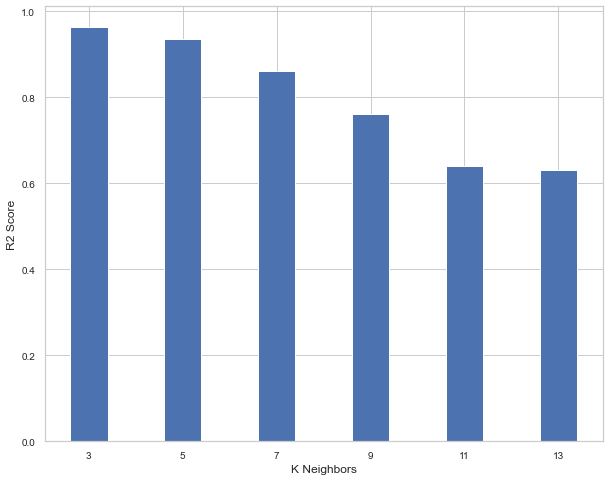

In [355]:
x_axis = range(3, 14, 2)
plt.figure(figsize=(10, 8))
plt.bar(x_axis, r2_scores)
plt.xticks(x_axis, x_axis, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('R2 Score', fontsize=12)
plt.xlabel('K Neighbors', fontsize=12)

# Conclusions

+ Our research question was trying to predict Airbnb's apartment rate based on pre-defined features
+ We've tried to reach our goal by using different machine learning methods and get the best prediction results
+ We found out that using linear regression with our dataset and its features did not gave us the results we want to achieve
+ With KNN method we got accuracy rate of more the 86% (depends on K value we chose) and we can answer the research question